# Combine data from different sources: 

In [1]:
from bs_fdbck.constants import path_measurement_data

In [2]:
import pandas as pd
import numpy as np
import xarray as xr

### Input data:


In [3]:
path_sizedist_ATTO = path_measurement_data /'ATTO'#'sizedistrib' 

In [4]:
list(path_sizedist_ATTO.glob('*'))

[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/processed'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/QACSM_time_series_C4_60m_2014_2016STP_v3.xlsx'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/sizedistrib'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/daily_median_QACSM_time_series_C4_60m_2014_2016STP_v3.csv'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/meteodataComplete.dat'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/ds_atto_2014_2019_4Sara.nc')]

In [5]:
path_acsm = path_measurement_data / 'ATTO'/ 'QACSM_time_series_C4_60m_2014_2016STP_v3.xlsx'

In [6]:
fn_theo = path_measurement_data / 'ATTO'/ 'ds_atto_2014_2019_4Sara.nc'

In [7]:
fn_meteo = path_measurement_data / 'ATTO'/ 'meteodataComplete.dat'

### Output data

In [8]:
postproc_data = path_measurement_data /'ATTO'/'processed'
postproc_data.mkdir( exist_ok=True)

path_acsm_daily_median = postproc_data /'daily_median_QACSM_time_series_C4_60m_2014_2016STP_v3.csv'

path_comb_data =postproc_data /'ATTO_data_comb_daily.nc'
path_comb_data_full_time =postproc_data /'ATTO_data_comb_hourly.nc'

In [9]:
path_comb_data_full_time

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/processed/ATTO_data_comb_hourly.nc')

### Read in acsm data

In [10]:
df_ATTO = pd.read_excel(path_acsm, sheet_name=0, index_col=0)#'QACSM 60m v3')

In [11]:
df_ATTO.index = df_ATTO.index.rename('time')

## ATTO is at UTC - 4: convert to local time 

In [12]:
import datetime

In [13]:
df_ATTO.index

Index(['1/1/2014 0:00', '1/1/2014 0:30', '1/1/2014 1:00', '1/1/2014 1:30',
       '1/1/2014 2:00', '1/1/2014 2:30', '1/1/2014 3:00', '1/1/2014 3:30',
       '1/1/2014 4:00', '1/1/2014 4:30',
       ...
       '1/3/2017 8:30', '1/3/2017 9:00', '1/3/2017 9:30', '1/3/2017 10:00',
       '1/3/2017 10:30', '1/3/2017 11:00', '1/3/2017 11:30', '1/3/2017 12:00',
       '1/3/2017 12:30', '1/3/2017 13:00'],
      dtype='object', name='time', length=52731)

In [14]:
time_ind = pd.to_datetime(df_ATTO.index)# -datetime.timedelta(hours=4)

In [15]:
time_ind_local_time = time_ind - datetime.timedelta(hours=4)
time_ind_local_time

DatetimeIndex(['2013-12-31 20:00:00', '2013-12-31 20:30:00',
               '2013-12-31 21:00:00', '2013-12-31 21:30:00',
               '2013-12-31 22:00:00', '2013-12-31 22:30:00',
               '2013-12-31 23:00:00', '2013-12-31 23:30:00',
               '2014-01-01 00:00:00', '2014-01-01 00:30:00',
               ...
               '2017-01-03 04:30:00', '2017-01-03 05:00:00',
               '2017-01-03 05:30:00', '2017-01-03 06:00:00',
               '2017-01-03 06:30:00', '2017-01-03 07:00:00',
               '2017-01-03 07:30:00', '2017-01-03 08:00:00',
               '2017-01-03 08:30:00', '2017-01-03 09:00:00'],
              dtype='datetime64[ns]', name='time', length=52731, freq=None)

In [16]:
df_ATTO.index = time_ind_local_time

In [17]:
df_ATTO_daily_med = df_ATTO.resample('1D').median()

<AxesSubplot:xlabel='time'>

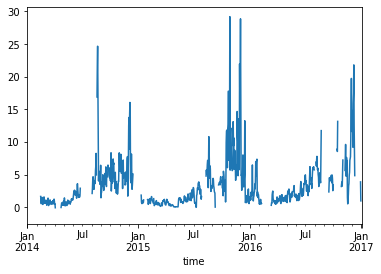

In [18]:
df_ATTO_daily_med['org (ug m-3)'].plot()

In [19]:
df_ATTO_daily_med['org (ug m-3)']

time
2013-12-31         NaN
2014-01-01         NaN
2014-01-02         NaN
2014-01-03         NaN
2014-01-04         NaN
                ...   
2016-12-30    3.880180
2016-12-31    0.968279
2017-01-01         NaN
2017-01-02         NaN
2017-01-03         NaN
Freq: D, Name: org (ug m-3), Length: 1100, dtype: float64

In [20]:
df_ATTO_daily_med = df_ATTO_daily_med.rename({'org (ug m-3)':'Org'}, axis=1)

In [21]:
df_ATTO_daily_med.to_csv(path_acsm_daily_median)

## Data from Theodore

In [22]:
ds = xr.open_dataset(fn_theo, engine='netcdf4')
ds['timeUTC-3'] = ds['time'].copy()

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [23]:
import matplotlib.pyplot as plt

### Add meteo data:

In [24]:
df_met = pd.read_csv(fn_meteo, sep='\t', index_col=0)

In [25]:
df_met = df_met.replace(9999,np.nan).rename({' temperature':'temperature'}, axis=1)

In [26]:
df_met.index = pd.to_datetime(df_met.index)

<AxesSubplot:xlabel='TimeUTC'>

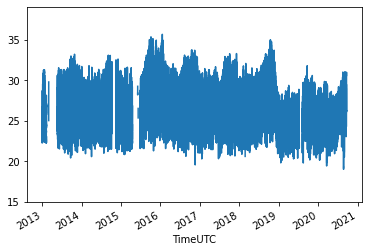

In [27]:
df_met['temperature'].plot()

In [28]:
vars_to_add_meteo = ['pressure', 'temperature', 'humidity', 'wind_dir', 'precip',
       'Solar_inc_Wm2', 'Solar_out_Wm2', 'wind_speed', 'wind_speed_v']


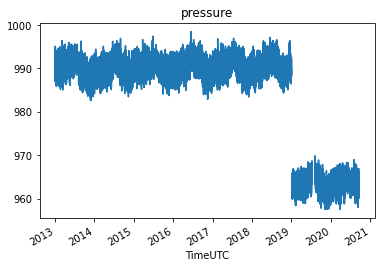

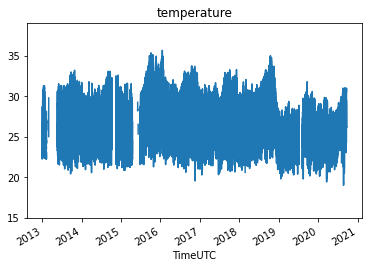

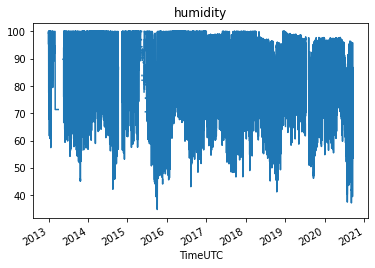

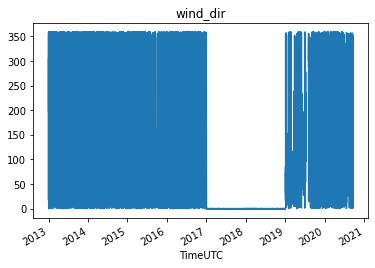

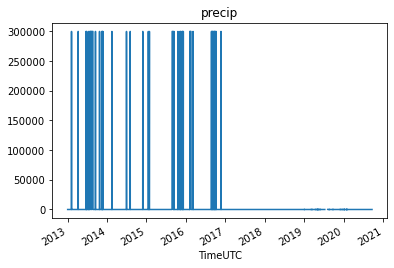

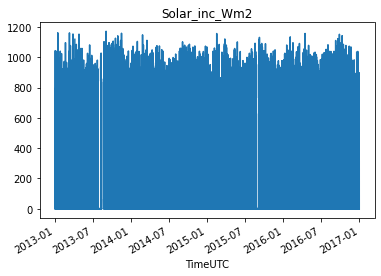

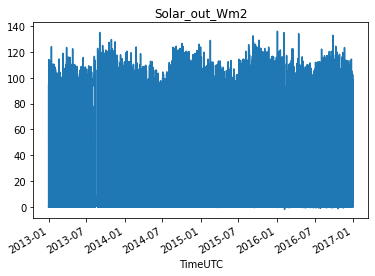

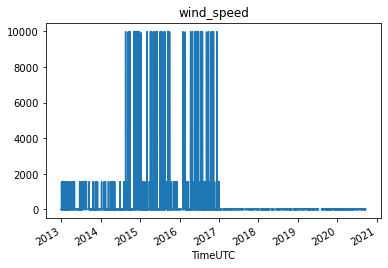

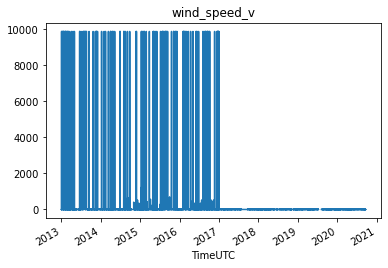

In [29]:

for v in vars_to_add_meteo:
    df_met[v].plot()
    plt.title(v)
    plt.show()

<AxesSubplot:xlabel='TimeUTC'>

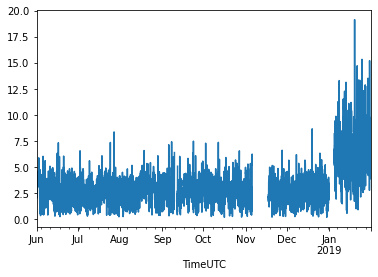

In [30]:
df_met['wind_speed'].loc['2018-06':'2019-01'].plot()

<AxesSubplot:xlabel='TimeUTC'>

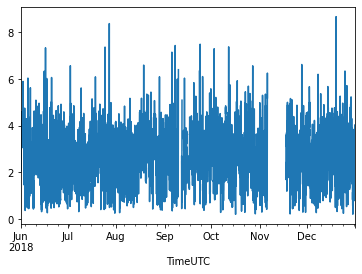

In [31]:
df_met['wind_speed'].loc['2018-06':'2018-12'].plot()

<AxesSubplot:xlabel='TimeUTC'>

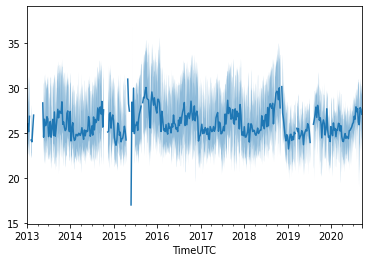

In [32]:
ts = df_met['temperature']
ma = ts.resample('1d').max()#.plot(alpha=0.5, label='ECHAM-SALSA', c='r')
mi = ts.resample('1d').min()#.plot(alpha=0.5, label='ECHAM-SALSA', c='r')
plt.fill_between(ma.index, mi, ma,alpha=0.5, label='ECHAM-SALSA')
ts.resample('7d').mean().plot()

In [33]:
ts


TimeUTC
2013-01-01 00:00:00    24.028
2013-01-01 00:30:00    24.003
2013-01-01 01:00:00    23.782
2013-01-01 01:30:00    23.742
2013-01-01 02:00:00    23.698
                        ...  
2020-09-19 21:30:00    30.713
2020-09-19 22:00:00    30.584
2020-09-19 22:30:00    30.616
2020-09-19 23:00:00    30.606
2020-09-19 23:30:00    30.585
Name: temperature, Length: 135311, dtype: float64

## Due to the change in the position of the instrument, we only use data up until end of 2018 (which is also when the model runs stop)

In [34]:
df_met = df_met.loc['2012-01':'2018-12']

In [35]:
df_met.loc[df_met['wind_speed']>100, 'wind_speed'] = np.nan
df_met.loc[df_met['wind_speed_v']>100,'wind_speed_v'] = np.nan

In [36]:
df_met.loc[df_met['precip']>4000,'precip'] = np.nan
#.plot()

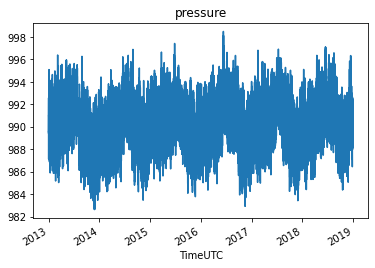

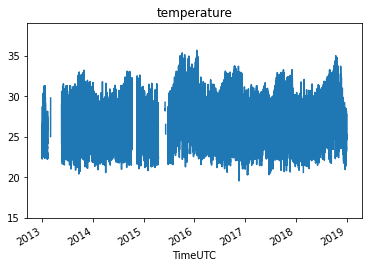

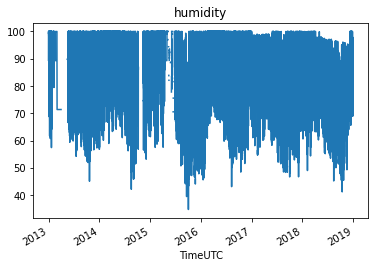

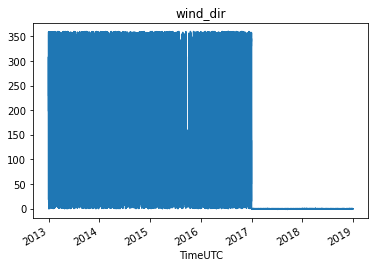

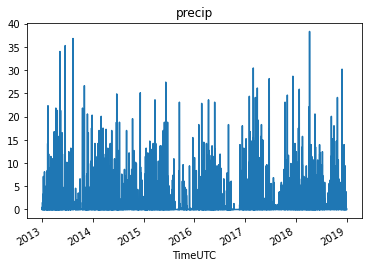

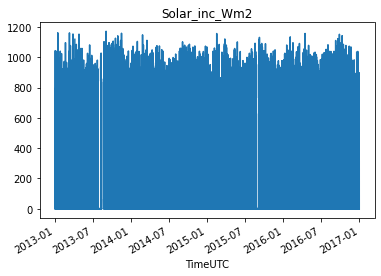

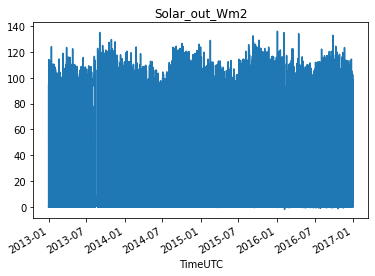

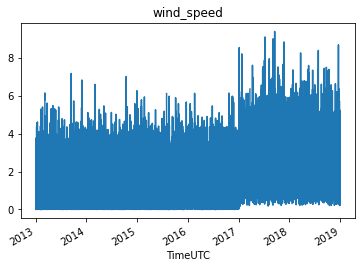

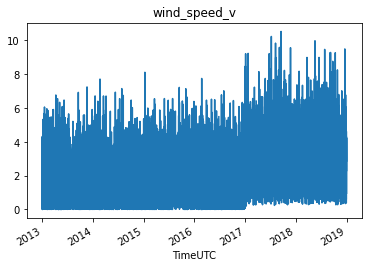

In [37]:

for v in vars_to_add_meteo:
    df_met[v].plot()
    plt.title(v)
    plt.show()

#### Go from UTC time to local time

In [38]:
df_met = df_met.reset_index()
df_met['TimeLocal'] = pd.to_datetime(df_met['TimeUTC']) - datetime.timedelta(hours=4)

df_met = df_met.set_index('TimeLocal')


In [39]:
df_met['hour'] = df_met.index.hour

In [40]:
df_met['temperature']

TimeLocal
2012-12-31 20:00:00    24.028000
2012-12-31 20:30:00    24.003000
2012-12-31 21:00:00    23.782000
2012-12-31 21:30:00    23.742000
2012-12-31 22:00:00    23.698000
                         ...    
2018-12-31 17:30:00    26.719333
2018-12-31 18:00:00    26.081000
2018-12-31 18:30:00    25.232000
2018-12-31 19:00:00    24.567333
2018-12-31 19:30:00    25.272333
Name: temperature, Length: 105167, dtype: float64

In [41]:
df_met.columns

Index(['TimeUTC', 'pressure', 'temperature', 'humidity', 'wind_dir', 'precip',
       'Solar_inc_Wm2', 'Solar_out_Wm2', 'wind_speed', 'wind_speed_v', 'hour'],
      dtype='object')

In [42]:
df_met_daily_med = df_met.resample('D').median()

In [43]:
df_met_daily_cycle = df_met.groupby(df_met['hour']).mean()

<AxesSubplot:xlabel='hour'>

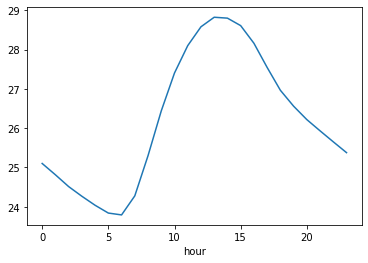

In [44]:
df_met_daily_cycle['temperature'].plot()

## Seems like Theos data is UTC-3, so we shift all to -4

In [45]:
ds['timeUTC'] = pd.to_datetime(ds['timeUTC-3']) + datetime.timedelta(hours=3)
ds['timeUTC-4'] = pd.to_datetime(ds['timeUTC']) - datetime.timedelta(hours=4)

ds['time'] = ds['timeUTC-4'].values

In [46]:
ds

<xarray.Dataset>
Dimensions:                (D: 104, time: 25448, time_traj: 121, timeUTC: 25448, timeUTC-4: 25448)
Coordinates:
  * D                      (D) float64 10.2 10.6 10.9 11.3 ... 385.4 399.5 414.2
  * time                   (time) datetime64[ns] 2014-03-10T15:00:00 ... 2019...
  * time_traj              (time_traj) int64 0 1 2 3 4 5 ... 116 117 118 119 120
  * timeUTC                (timeUTC) datetime64[ns] 2014-03-10T19:00:00 ... 2...
  * timeUTC-4              (timeUTC-4) datetime64[ns] 2014-03-10T15:00:00 ......
Data variables: (12/20)
    pnsd                   (time, D) float64 ...
    Pressure               (time, time_traj) float64 ...
    Potential_Temperature  (time, time_traj) float64 ...
    Temperature            (time, time_traj) float64 ...
    Rainfall               (time, time_traj) float64 ...
    Mixing_Depth           (time, time_traj) float64 ...
    ...                     ...
    condensation_sink      (time) float64 ...
    pnsd_nolog             (time, D) float64 ...
    N50                    (time) float64 ...
    N100                   (time) float64 ...
    N200                   (time) float64 ...
    timeUTC-3              (time) datetime64[ns] 2014-03-10T16:00:00 ... 2019...

In [47]:
_ds = ds.groupby('time.hour').mean()

In [48]:
ds['hour'] = ds['time.hour']

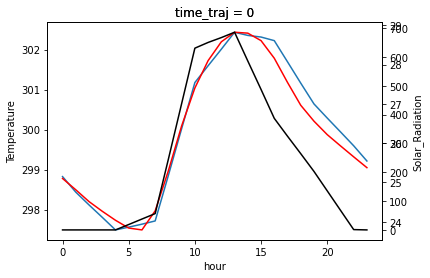

In [49]:
f,ax = plt.subplots()
ds['Temperature'].isel(time_traj=0).groupby(ds['hour']).mean().plot()

df_met_daily_cycle['temperature'].plot(ax = ax.twinx(), c='r')

ds['Solar_Radiation'].isel(time_traj=0).groupby(ds['hour']).mean().plot(ax = ax.twinx(), c='k')


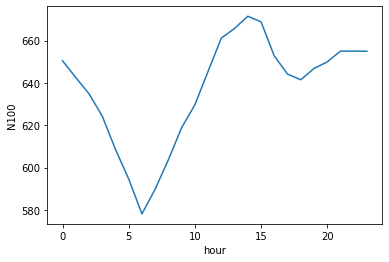

In [50]:
ds['N100'].groupby(ds['hour']).mean().plot()#ax = ax.twinx(), c='k')


### Rename reanalysis variables and add meteo variables to final dataset

In [51]:
ds = ds.rename(dict(
    Pressure='Pressure_reanalysis',
    Temperature='Temperature_reanalysis',
    Potential_Temperature='Potential_Temperature_reanalysis',
    Specific_Humidity = 'Specific_Humidity_reanalysis',
    
    
))
ds = ds.rename(dict(
    N50='N50-500',
    N100 ='N100-500',
    N200 ='N200-500',
))

In [52]:
from_dt = ds['time'].isel(time=0).values
to_dt = ds['time'].isel(time=-1).values


for v in vars_to_add_meteo:
    xa = xr.DataArray(df_met[v]).rename(dict(TimeLocal='time'))
    ds[v] = xa.sel(time=slice(from_dt, to_dt))

In [53]:
ds_stat = ds.sel(time_traj = 0)

In [54]:
ds_stat_day = ds_stat.resample({'time':'D'}).median()

In [55]:
ds_stat_day = ds_stat_day.assign({'Org':df_ATTO_daily_med.to_xarray()['Org']})

## Check how well Reanalis temperature fits

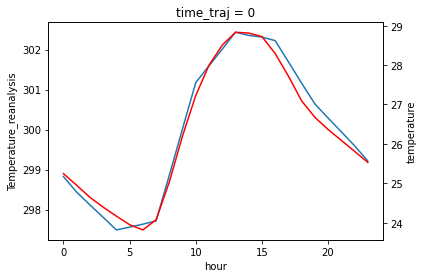

In [ ]:
f,ax = plt.subplots()
ds['Temperature_reanalysis'].isel(time_traj=0).groupby(ds['hour']).mean().plot()
ds['temperature'].groupby(ds['hour']).mean().plot(ax = ax.twinx(), c='r')


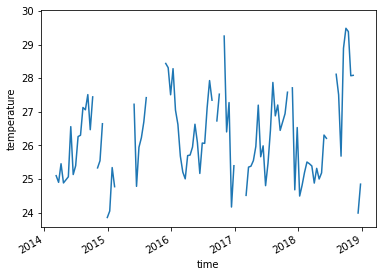

In [ ]:
ds['temperature'].resample(time='14d').mean().plot()

In [ ]:
ds

<xarray.Dataset>
Dimensions:                           (time: 25448, D: 104, time_traj: 121, timeUTC: 25448, timeUTC-4: 25448)
Coordinates:
  * time                              (time) datetime64[ns] 2014-03-10T15:00:...
  * D                                 (D) float64 10.2 10.6 10.9 ... 399.5 414.2
  * time_traj                         (time_traj) int64 0 1 2 3 ... 118 119 120
  * timeUTC                           (timeUTC) datetime64[ns] 2014-03-10T19:...
  * timeUTC-4                         (timeUTC-4) datetime64[ns] 2014-03-10T1...
Data variables: (12/30)
    pnsd                              (time, D) float64 ...
    Pressure_reanalysis               (time, time_traj) float64 ...
    Potential_Temperature_reanalysis  (time, time_traj) float64 ...
    Temperature_reanalysis            (time, time_traj) float64 ...
    Rainfall                          (time, time_traj) float64 ...
    Mixing_Depth                      (time, time_traj) float64 ...
    ...                                ...
    wind_dir                          (time) float64 47.08 89.36 ... nan nan
    precip                            (time) float64 0.0 0.0 0.0 ... nan nan nan
    Solar_inc_Wm2                     (time) float64 655.0 212.0 ... nan nan
    Solar_out_Wm2                     (time) float64 67.26 24.31 ... nan nan
    wind_speed                        (time) float64 1.666 0.03636 ... nan nan
    wind_speed_v                      (time) float64 1.792 3.24 ... nan nan

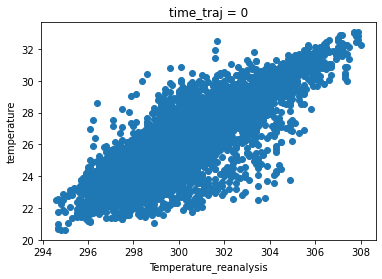

In [ ]:
ds.isel(time_traj=0).sel(time=slice('2014','2014')).plot.scatter(x='Temperature_reanalysis', y = 'temperature')

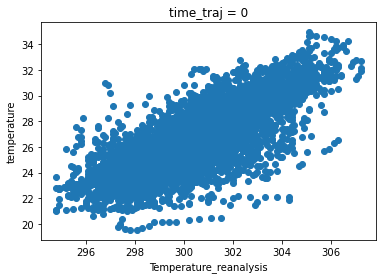

In [ ]:
ds.isel(time_traj=0).sel(time=slice('2016-01','2016')).plot.scatter(x='Temperature_reanalysis', y = 'temperature')

In [ ]:
ds_stat_day.to_netcdf(path_comb_data)

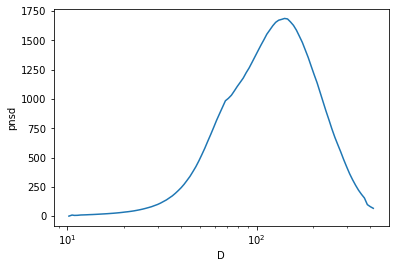

In [ ]:
ds['pnsd'].mean('time').plot(xscale='log')

In [ ]:
ds_nx = ds_stat_day

<AxesSubplot:xlabel='time'>

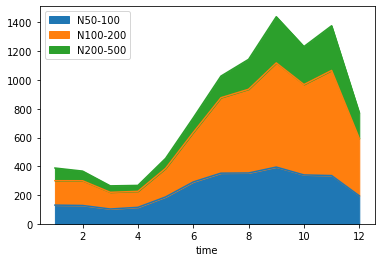

In [ ]:
ds_nx['N50-100'] = ds_nx['N50-500']-ds_nx['N100-500']
ds_nx['N100-200'] = ds_nx['N100-500']-ds_nx['N200-500']
_df = ds_nx[['N50-100','N100-200','N200-500']].to_dataframe().drop('time_traj', axis=1)

_df.groupby(_df.index.month).median().plot(kind='area', stacked='true',)#, alpha=.2)



In [ ]:
ds['N50-500'].mean('time')

<xarray.DataArray 'N50-500' ()>
array(925.84488543)

In [ ]:
ds

<xarray.Dataset>
Dimensions:                           (time: 25448, D: 104, time_traj: 121, timeUTC: 25448, timeUTC-4: 25448)
Coordinates:
  * time                              (time) datetime64[ns] 2014-03-10T15:00:...
  * D                                 (D) float64 10.2 10.6 10.9 ... 399.5 414.2
  * time_traj                         (time_traj) int64 0 1 2 3 ... 118 119 120
  * timeUTC                           (timeUTC) datetime64[ns] 2014-03-10T19:...
  * timeUTC-4                         (timeUTC-4) datetime64[ns] 2014-03-10T1...
Data variables: (12/30)
    pnsd                              (time, D) float64 6.811e-05 ... 20.85
    Pressure_reanalysis               (time, time_traj) float64 ...
    Potential_Temperature_reanalysis  (time, time_traj) float64 ...
    Temperature_reanalysis            (time, time_traj) float64 ...
    Rainfall                          (time, time_traj) float64 ...
    Mixing_Depth                      (time, time_traj) float64 ...
    ...                                ...
    wind_dir                          (time) float64 47.08 89.36 ... nan nan
    precip                            (time) float64 0.0 0.0 0.0 ... nan nan nan
    Solar_inc_Wm2                     (time) float64 655.0 212.0 ... nan nan
    Solar_out_Wm2                     (time) float64 67.26 24.31 ... nan nan
    wind_speed                        (time) float64 1.666 0.03636 ... nan nan
    wind_speed_v                      (time) float64 1.792 3.24 ... nan nan

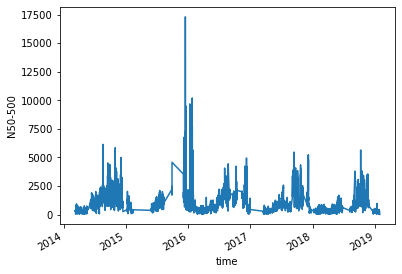

In [67]:
ds['N50-500'].plot()

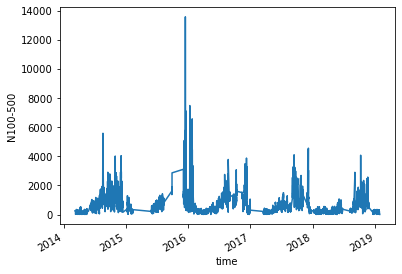

In [68]:
ds['N100-500'].plot()

In [69]:
ds['N100-500'].mean('time')

<xarray.DataArray 'N100-500' ()>
array(637.09319922)

In [70]:
ds['N200-500'].mean('time')

<xarray.DataArray 'N200-500' ()>
array(176.91365316)

In [71]:
ds = ds.assign({'OA':df_ATTO['org (ug m-3)'].resample('h').mean()})

(-10.0, 40.0)

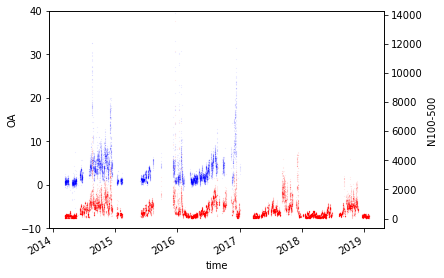

In [72]:
fig, ax = plt.subplots()
ds['OA'].plot(c = 'b', alpha=0.5, marker='.', linewidth=0, markersize=.1)

ds['N100-500'].plot(ax = ax.twinx(),c = 'r', alpha=0.5, marker='.', linewidth=0, markersize=.1)
ax.set_ylim([-10,40])

## Save dataset

In [73]:
ds.to_netcdf(path_comb_data_full_time)

In [74]:
ds = xr.open_dataset(path_comb_data_full_time)

In [75]:
ds

<xarray.Dataset>
Dimensions:                           (time: 25448, D: 104, time_traj: 121, timeUTC: 25448, timeUTC-4: 25448)
Coordinates:
  * time                              (time) datetime64[ns] 2014-03-10T15:00:...
  * D                                 (D) float64 10.2 10.6 10.9 ... 399.5 414.2
  * time_traj                         (time_traj) int64 0 1 2 3 ... 118 119 120
  * timeUTC                           (timeUTC) datetime64[ns] 2014-03-10T19:...
  * timeUTC-4                         (timeUTC-4) datetime64[ns] 2014-03-10T1...
Data variables: (12/31)
    pnsd                              (time, D) float64 ...
    Pressure_reanalysis               (time, time_traj) float64 ...
    Potential_Temperature_reanalysis  (time, time_traj) float64 ...
    Temperature_reanalysis            (time, time_traj) float64 ...
    Rainfall                          (time, time_traj) float64 ...
    Mixing_Depth                      (time, time_traj) float64 ...
    ...                                ...
    precip                            (time) float64 ...
    Solar_inc_Wm2                     (time) float64 ...
    Solar_out_Wm2                     (time) float64 ...
    wind_speed                        (time) float64 ...
    wind_speed_v                      (time) float64 ...
    OA                                (time) float64 ...

## Extra